# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to create new model images
## Step 1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'zoo_0',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Starting score parameters '
            'file for '
            '587722984435351614',
 'imgArg': {'comment': 'Starting image '
                       'parameters for '
                       '587722984435351614',
            'galaxy_centers': {'px': 513,
                               'py': 514,
                               'sx': 309,
                               'sy': 608},
            'image_size': {'height': 1024,
                           'width': 1024},
            'name': 'zoo_0'},
 'name': 'zoo_0',
 'scoreType': 'model_fitness_score',
 'simArg': {'nPts': '100k',
            'name': '100k'}}


Text(0.5, 1.0, 'Starting Target Image')

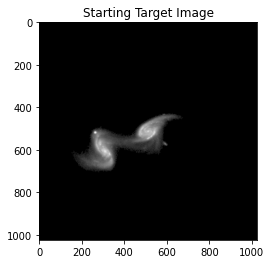

In [3]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

#tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")



___
## Step 4: Create a new image parameter


In [4]:
# Create a blank group score parameter and copy starting parameters
newName = 'zoo_test'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Demonstrating how to create a new image parameter'
new_params[newName]['imgArg']['comment'] = cmt

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 300
new_params[newName]['imgArg']['image_size']['height'] = 200

# If you want to change the galaxy centers
# Primary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['px'] = 100
new_params[newName]['imgArg']['galaxy_centers']['py'] = 100
# Secondary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['sx'] = 200
new_params[newName]['imgArg']['galaxy_centers']['sy'] = 100
# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
new_params[newName]['cmpArg']['targetName'] = newName

# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = 1.5

# If you want to modify the radial brightness constant
pc = 2.5    # primary galaxy
sc = 1.5     #secondary galaxy
new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5
gm.pprint(new_params)

{'zoo_test': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                         'targetName': 'zoo_test',
                         'targetType': 'target_image',
                         'type': 'direct_image_comparison'},
              'comment': 'Starting '
                         'score '
                         'parameters '
                         'file for '
                         '587722984435351614',
              'imgArg': {'blur': {'size': 5,
                                  'type': 'gaussian_blur',
                                  'weight': 1.5},
                         'comment': 'Demonstrating '
                                    'how '
                                    'to '
                                    'create '
                                    'a '
                                    'new '
                                    'image '
                                    'parameter',
                         'galaxy_centers': {'px'

___
## Step 4.1
### Create a new target Image
If the size and centers were modified, then create a new target image to match the size and centers


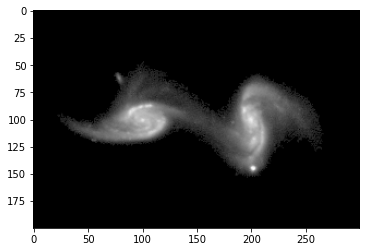

In [5]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Create and return new target image
tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True )

if type(tImg) != type(None):
    plt.imshow( tImg, cmap='gray')

else:
    print("WARNING!  Target image not found")

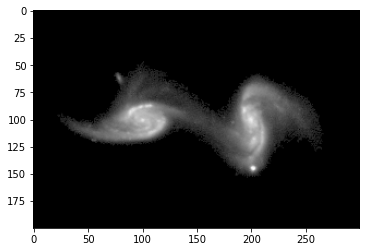

In [6]:
# Double check you can retrieve image later on. 
tImg2 = tInfo.getTargetImage( newName )
if type(tImg2) != type(None):
    plt.imshow( tImg2, cmap='gray')

In [7]:
print(tImg.shape)
rImg = rInfo.getModelImage(newName)
print(rImg.shape)

(200, 300)
(200, 300)


___
## Step 5
### Test if SIMR pipeline can create the new model image!

In [8]:

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.simr_run( rInfo=rInfo, arg = newImgArg )
rInfo.printScores(allScores=True)

Run 'run_0000' Good!
True


TypeError: simr_run() got an unexpected keyword argument 'arg'

___
## Step 5.1
### View results for the new Model Image!

In [ ]:
# View new model image next to target image
mImg = rInfo.getModelImage( newName )

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['cmpArg']['targetName']), cmap='gray' )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( rInfo.getModelImage( old_param['imgArg']['name'] ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow(tImg,cmap='gray')

ax[1,1].set_title("New Model Image")
ax[1,1].imshow(mImg,cmap='gray')

___
## Step 6
### Save your new image parameters!

In [ ]:
# Add to target image repository
tInfo.addImageParams( new_params )

# Or save to a location of your choosing
tInfoLoc = tInfo.get("infoDir")
imgParamLoc = '../param/' + 'param_zoo_test.json'
gm.saveJson( new_params, imgParamLoc )

***
## Step 7
### Go through all models and see if new image improves results!

Note!:  This will take several minutes. Consider running in command line instead

In [ ]:
# Define arguments for executing simr target
newScoreArg = gm.inArgClass( )
newScoreArg.setArg( 'scoreParams', new_params )  # Give new parameter
newScoreArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newScoreArg.setArg( 'newImage', True )  # Make true if you want new image
newScoreArg.setArg( 'newScore', True )  # Make true if you want new image
newScoreArg.setArg( 'overWrite', False )  # Make true if you need to overwrite

# Run through simr target image and score creation
simr.simr_target( tInfo = tInfo, arg = newScoreArg )


In [ ]:
scores = tInfo.getScores()
#print(scores.columns)
#print(scores['zoo_test'])
#fig, ax = plt.subplots(1,2,figsize=(12,12))
sa.getNamedPlot(scores, sName='base0_corr' )
sa.getNamedPlot( scores, sName=newName )